In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
from citipy import citipy

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [11]:
# Import our dependencies and initialize counters and an empty list that will hold the weather data.
import time
from datetime import datetime

city_data = []
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through the cities list.
for i, city in enumerate(cities):
# Group the cities in sets of 50 to log the process as we find the weather data for each city.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)    
# Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
    record_count += 1
# Build the city_url or endpoint for each city.
    city_url = url + "&q=" + city.replace(" ","+")
# Log the URL and the record and set numbers.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
# Make an API request for each city.
    try:
# Parse the JSON weather data for the following:
        city_weather = requests.get(city_url).json()
# City, country, and date
        city_name = city
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
    
# Latitude and longitude
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
# Maximum temperature
        city_max_temp = city_weather["main"]["temp_max"]
# Humidity
        city_humidity = city_weather["main"]["humidity"]
# Cloudiness
        city_clouds = city_weather["clouds"]["all"]
# Wind speed
        city_wind = city_weather["wind"]["speed"]
# Add the data to a list in a dictionary format and then convert the list to a DataFrame.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 2 of Set 1 | boras
Processing Record 3 of Set 1 | gilgil
City not found. Skipping...
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | barrow
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | kongoussi
Processing Record 9 of Set 1 | te anau
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | geraldton
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | ola
Processing Record 16 of Set 1 | moerai
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | kautokeino
Processing Record 20 of Set 1 | longyearbyen
Processing Record 21 of Set 1 | beringovskiy
Processing Record 22 of Set 1 | honiara
Processing Record 23 of Set 

In [12]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Boras,57.7210,12.9401,50.83,91,100,6.58,SE,2022-10-13 17:20:55
1,Castro,-24.7911,-50.0119,65.62,89,100,8.70,BR,2022-10-13 17:20:34
2,Barrow,71.2906,-156.7887,26.62,68,75,9.22,US,2022-10-13 17:20:56
3,Mataura,-46.1927,168.8643,34.59,99,20,3.15,NZ,2022-10-13 17:20:56
4,Thompson,55.7435,-97.8558,32.16,100,100,14.97,CA,2022-10-13 17:20:56


In [17]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]

In [18]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Boras,SE,2022-10-13 17:20:55,57.7210,12.9401,50.83,91,100,6.58
1,Castro,BR,2022-10-13 17:20:34,-24.7911,-50.0119,65.62,89,100,8.70
2,Barrow,US,2022-10-13 17:20:56,71.2906,-156.7887,26.62,68,75,9.22
3,Mataura,NZ,2022-10-13 17:20:56,-46.1927,168.8643,34.59,99,20,3.15
4,Thompson,CA,2022-10-13 17:20:56,55.7435,-97.8558,32.16,100,100,14.97


In [19]:
output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

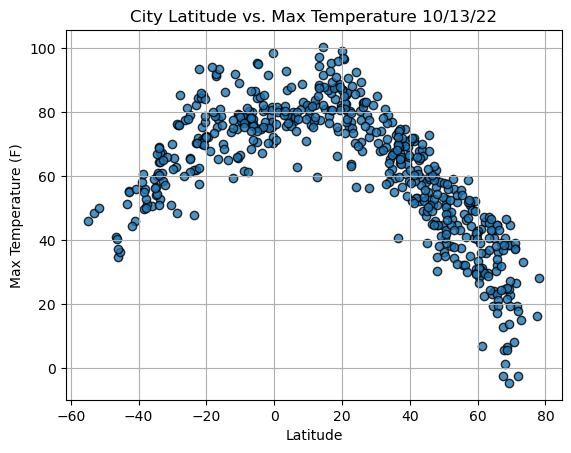

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

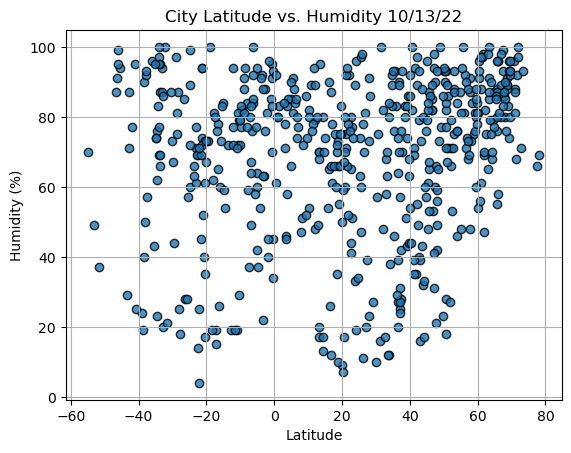

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

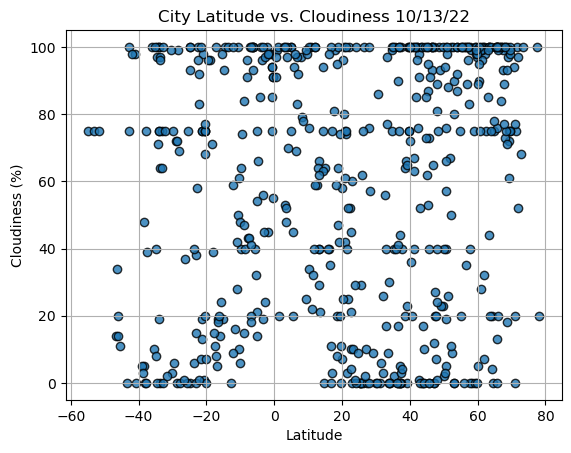

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

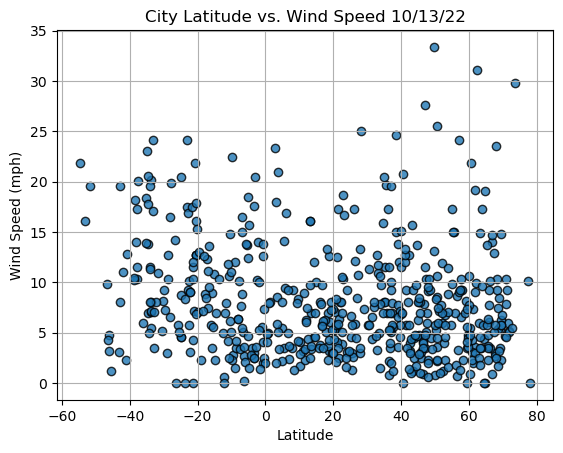

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()